In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('Train.csv')
x_train = df.drop(columns=['class'])
y_train= df['class']
#y_trainsample = y_train.head(100)
y_trainsample = y_train

In [4]:
for column in x_train.columns:
    if x_train[column].dtype==type(object):
         labelencoder = LabelEncoder()
         x_train[column] = labelencoder.fit_transform(x_train[column])
#x_trains = x_train.head(100)


In [5]:
labelencoder = LabelEncoder()

y_train = labelencoder.fit_transform(y_trainsample)

In [7]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [12]:
df2 = pd.read_csv('Test.csv')
x_test = df2.drop(columns = ['class'])
y_test= df2['class']
#y2 = y1.head(100)

for column in x_test.columns:
    if x_test[column].dtype == type(object):
        labelencoder1 = LabelEncoder()
        x_test[column] = labelencoder1.fit_transform(x_test[column])


In [13]:
labelencoder = LabelEncoder()

y_test = labelencoder.fit_transform(y_test)

In [14]:
#x_test = x1.head(100)

In [16]:
# Predict class labels on training data
pred_labels_tr = model.predict(x_train)
    # Predict class labels on a test data
pred_labels_te = model.predict(x_test)

In [18]:

print('----- Evaluation on Training Data -----')
score_tr = model.score(x_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

----- Evaluation on Training Data -----
Accuracy Score:  0.5342732172767181
              precision    recall  f1-score   support

           0       0.49      0.02      0.03     58630
           1       0.53      0.98      0.69     67343

    accuracy                           0.53    125973
   macro avg       0.51      0.50      0.36    125973
weighted avg       0.51      0.53      0.39    125973

--------------------------------------------------------


In [19]:
# Use score method to get accuracy of the model
print('----- Evaluation on Test Data -----')
score_te = model.score(x_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')

----- Evaluation on Test Data -----
Accuracy Score:  0.45031937544357703
              precision    recall  f1-score   support

           0       0.94      0.04      0.07     12833
           1       0.44      1.00      0.61      9711

    accuracy                           0.45     22544
   macro avg       0.69      0.52      0.34     22544
weighted avg       0.72      0.45      0.30     22544

--------------------------------------------------------


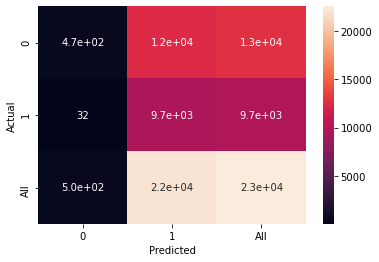

In [20]:
cm = pd.crosstab(y_test, pred_labels_te, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(cm, annot=True)
plt.show()